<a href="https://colab.research.google.com/github/camilodlt/rtidy-python/blob/main/Cartoon/Cartoon_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Modules 
import cv2 # import open cv for image processing 
import numpy as np #to store image
import imageio #to read image stored at particular path
from google.colab.patches import cv2_imshow as google_display # display images in google colab

import sys
import matplotlib.pyplot as plt
import os
#import tkinter as tk
#from tkinter import filedialog
#from tkinter import *
#from PIL import ImageTk, Image

In [ ]:
# Running on Google collab 
# Mount google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Go to the root of Gdrive 
%cd drive/MyDrive/

# Clone git repo 
!git clone https://github.com/camilodlt/rtidy-python.git # Folder is created automatically


/content/drive/MyDrive
fatal: destination path 'rtidy-python' already exists and is not an empty directory.


In [ ]:
# Go to the cloned repo and to the folder Cartoon
# That's where the images are stored
%cd /content/drive/MyDrive/rtidy-python/Cartoon

/content/drive/MyDrive/rtidy-python/Cartoon


In [ ]:
! ls

big_cat.jpg  cats.jpg  lezard.jpg  README


We have three photos in that repo that we will try to "cartoonize". Let's see them. 

In [ ]:
# Leopard photo
img_1 = cv2.imread('big_cat.jpg')
# cats photo 
img_2 = cv2.imread('cats.jpg')
# lezard 
img_3 = cv2.imread('lezard.jpg')

## Photos are pretty big, i'll keep 30% of its size.

# Put images in a list 
list_images= [img_1,img_2,img_3]
# List of resized images 
resized_list=[]
# factor to keep
scale_percent = 1/10
for i in list_images:
  #calculate the new dimensions percent of original dimensions
  width = int(i.shape[1] * scale_percent)
  height = int(i.shape[0] * scale_percent)
  # Tuple of width and height 
  dim = (width, height) # 
  # resize 
  resized_list.append(cv2.resize(i, dim))



Now we can see them: 

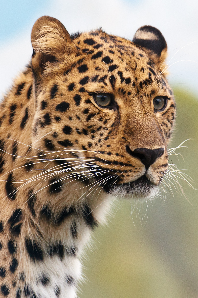

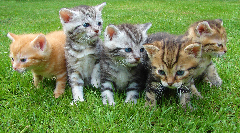

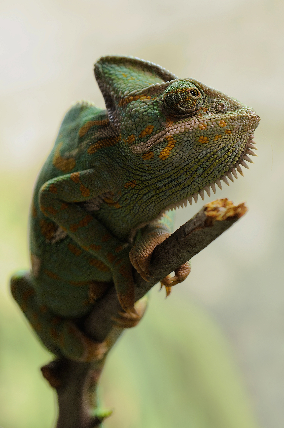

In [ ]:
for i in resized_list: 
  google_display(i)

Now that we have the photos, we can begin to transform them into drawings. 
First, we will change the color space from BGR to RGB because open cv reads images in BGR. 

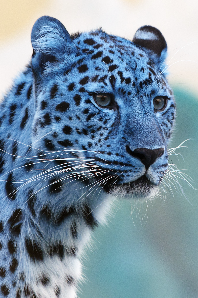

In [ ]:
rgb = cv2.cvtColor(resized_list[0], cv2.COLOR_BGR2RGB)
google_display(rgb)

Obviously, the result is the same but cv2. imshow() expects the images to be in BGR order.  
Now we can convert the image to grayscale. We'll use the same function cv2.cvtColor but this time we will use the flag RGB2GRAY




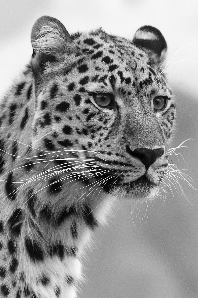

In [ ]:
gray = cv2.cvtColor(resized_list[0], cv2.COLOR_BGR2GRAY)
google_display(gray)

Now we apply an average technique : the medianBlur. You may be familiar with this function because it can remove noise in images. Center pixels in square windows are replaced with the median value of the square. 

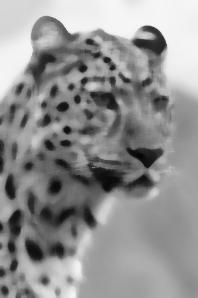

In [ ]:
blured = cv2.medianBlur(gray, 7) # I understand that this number needs to be odd
google_display(blured)

Now we will try to find the edges of the image. Cv2 comes with a lot of tools for this task. 

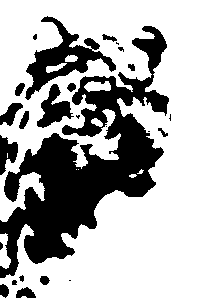

In [ ]:
#by using thresholding technique
blured_1=cv2.threshold(blured, thresh=127,maxval=255, type= cv2.THRESH_BINARY)
google_display(blured_1[1])

The result can be smoother with an adaptative threshold. CV2 algotihm decides the threshold value for small regions. We will use the mean of the regions as the threshold value using cv2.adaptiveThreshold function with the method cv2.ADAPTIVE_THRESH_MEAN_C

Blured
With box of size 5x5


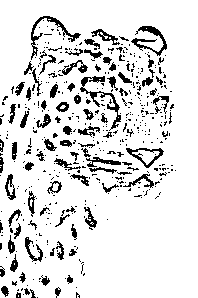

Blured
With box of size 11x11


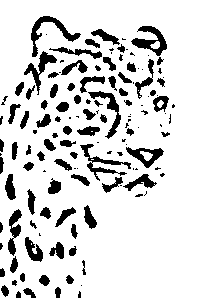

non-blured
With box of size 11x11
This happens if we don't blur the image before. It get's too shap 


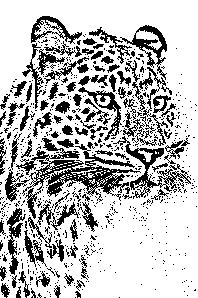

non-blured
With box of size 33x33
With a bigger sie area for the adaptive threshold, the result is also nice, more detailed.


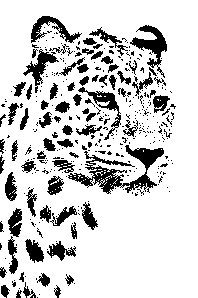

In [71]:
# With box of size 5X5
print("Blured")
print("With box of size 5x5")
edge = cv2.adaptiveThreshold(  
    blured,
    255, # max value  
    cv2.ADAPTIVE_THRESH_MEAN_C, # method  
    cv2.THRESH_BINARY, # Threshold type 
    5,5) # size of the area
google_display(edge)

# With box of size 11x11
print("Blured")
print("With box of size 11x11")
edge = cv2.adaptiveThreshold(  
    blured,
    255, # max value  
    cv2.ADAPTIVE_THRESH_MEAN_C, # method  
    cv2.THRESH_BINARY, # Threshold type 
    11, 11) # size of the area
google_display(edge)

# With box of size 9x9
print("non-blured")
print("With box of size 11x11")
print("This happens if we don't blur the image before. It get's too shap ")
gray_edge = cv2.adaptiveThreshold(  
    gray,
    255, # max value  
    cv2.ADAPTIVE_THRESH_MEAN_C, # method  
    cv2.THRESH_BINARY, # Threshold type 
    9, 9) # size of the area
google_display(gray_edge)

# With box of size 33x33
print("non-blured")

print("With box of size 33x33")
print("With a bigger sie area for the adaptive threshold, the result is also nice, more detailed.")
gray_edge = cv2.adaptiveThreshold(  
    gray,
    255, # max value  
    cv2.ADAPTIVE_THRESH_MEAN_C, # method  
    cv2.THRESH_BINARY, # Threshold type 
    33, 33) # size of the area
google_display(gray_edge)

pre-blured


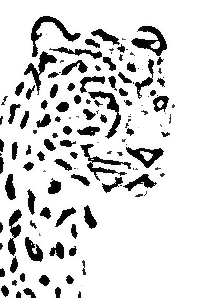



non-blured


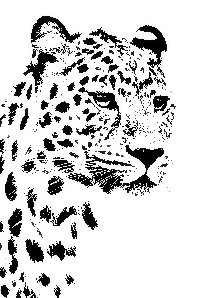

In [72]:
# Bilateral # Noise reduction 
print("pre-blured")
bilateral=cv2.bilateralFilter(edge,
                              10, # size of the neighborhood 
                              100,100) # sigma color. Per the documentation : "Filter sigma in the color space.
                               #A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace ) 
                               #will be mixed together, resulting in larger areas of semi-equal color.
google_display(bilateral)

# Bilateral # Noise reduction 
print("\n")
print("non-blured")
bilateral=cv2.bilateralFilter(gray_edge,
                              10, # size of the neighborhood 
                              100,100) # sigma color. Per the documentation : "Filter sigma in the color space.
                               #A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace ) 
                               #will be mixed together, resulting in larger areas of semi-equal color.
google_display(bilateral)

In [ ]:
# cv2.bitwise_and 
# 

In [ ]:
def cartoonify(ImagePath):
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')


    #converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    #plt.imshow(ReSized2, cmap='gray')


    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(ReSized3, cmap='gray')

    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(ReSized4, cmap='gray')

    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #plt.imshow(ReSized5, cmap='gray')


    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')

    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()
    
    
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()





TclError: ignored